In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, accuracy_score
import shap

In [2]:
# Load the Wisconsin Breast Cancer dataset
file_path = r"C:\Users\Shaurya\Desktop\AI4BCancer\Dataset\data.csv"
df = pd.read_csv(file_path)

In [3]:
# Drop unnecessary columns
df = df.drop(columns=['id', 'Unnamed: 32'])

In [4]:
# Encode the 'diagnosis' column (M=1, B=0)
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['diagnosis'] = label_encoder.fit_transform(df['diagnosis'])

In [5]:
# Handle missing values by dropping rows with null values
df = df.dropna()

In [6]:
# Split the dataset into features (X) and target variable (y)
X = df.drop(columns=['diagnosis'])
y = df['diagnosis']

In [7]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Standardize the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [9]:
# Implement and train the XGBoost Classifier
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train_scaled, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [10]:
# Evaluate the model on the test set
y_pred = xgb_model.predict(X_test_scaled)

In [11]:
# Evaluate the model on the test set
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:\n", report)

Accuracy: 0.9561
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.97      0.97        71
           1       0.95      0.93      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



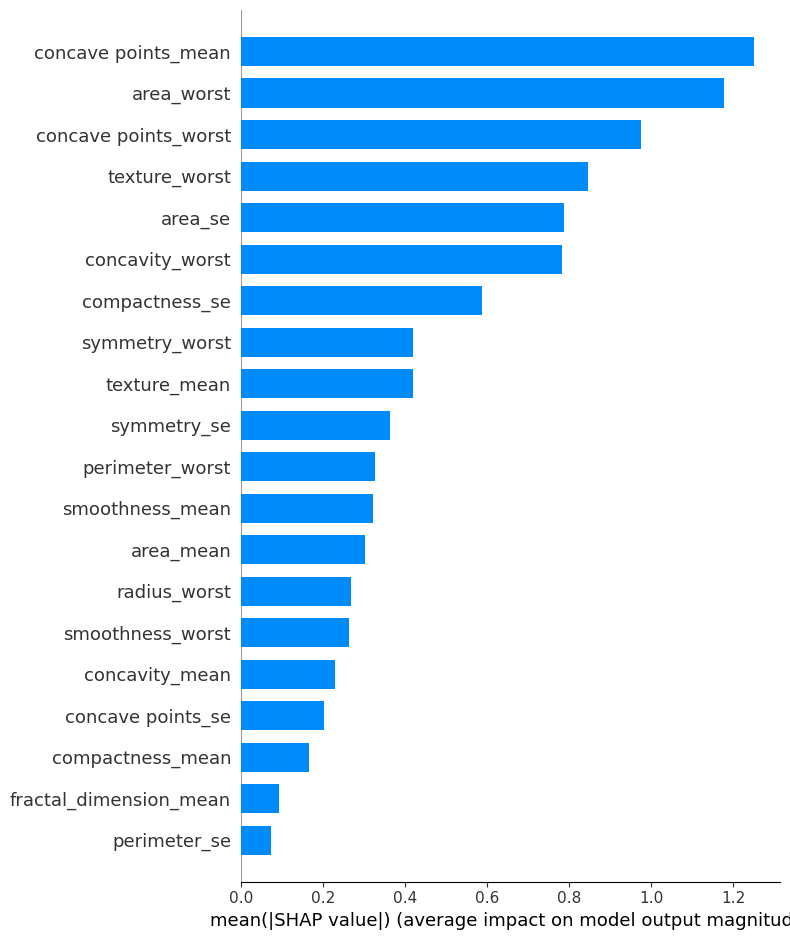

In [12]:
# Explain model predictions using SHAP
explainer = shap.Explainer(xgb_model)
shap_values = explainer(X_test_scaled)

# SHAP Summary Plot
plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values, X_test_scaled, feature_names=X.columns, plot_type="bar")
plt.show()

In [13]:
# Textual Explanation
feature_importance = np.abs(shap_values.values).mean(0)
importance_df = pd.DataFrame(list(zip(X.columns, feature_importance)), columns=['feature', 'importance'])
importance_df = importance_df.sort_values(by='importance', ascending=False)

print("\nFeature Importances (from SHAP analysis):")
print(importance_df)

# Show the plot
plt.show()


Feature Importances (from SHAP analysis):
                    feature  importance
7       concave points_mean    1.251807
23               area_worst    1.177029
27     concave points_worst    0.975928
21            texture_worst    0.846842
13                  area_se    0.787382
26          concavity_worst    0.782375
15           compactness_se    0.588523
28           symmetry_worst    0.420688
1              texture_mean    0.419982
18              symmetry_se    0.364100
22          perimeter_worst    0.326147
4           smoothness_mean    0.321377
3                 area_mean    0.303718
20             radius_worst    0.269449
24         smoothness_worst    0.264206
6            concavity_mean    0.228411
17        concave points_se    0.202400
5          compactness_mean    0.165571
9    fractal_dimension_mean    0.094030
12             perimeter_se    0.073002
10                radius_se    0.047372
19     fractal_dimension_se    0.041647
16             concavity_se    0.0403

In [14]:
# Detailed Feature Explanations with General Definitions
feature_explanations = {
    "concave points_mean": "Average number of concave portions of the contour of the tumor. More concave points may indicate a more irregular and potentially more aggressive tumor.",
    "area_worst": "The area of the worst segment of the tumor, indicating the size of the tumor in its most severe state.",
    "concave points_worst": "Number of concave portions on the contour in the worst segment of the tumor. Higher counts suggest significant irregularities in tumor shape.",
    "texture_worst": "Texture measured as the standard deviation of gray-scale values in the most severe tumor area. Higher values may indicate more heterogeneous tissue density.",
    "area_se": "Standard error of the tumor area, a measure of the variability of tumor size.",
    "concavity_worst": "Severity of concave portions of the contour in the worst segment of the tumor. Higher severity indicates more pronounced concavity.",
    "compactness_se": "Standard error of the compactness of the tumor (perimeter^2 / area - 1.0), a measure of the tumor's complexity.",
    "symmetry_worst": "Symmetry in the worst segment of the tumor, indicating the balance in shape and structure in the most severe part of the tumor.",
    "texture_mean": "Average of the standard deviation of gray-scale values within the tumor. Reflects variation in cell structures in the tissue.",
    "symmetry_se": "Standard error in the symmetry of the tumor, indicating the variability in the tumor's symmetry.",
    "perimeter_worst": "Perimeter size of the largest tumor segment. Larger perimeters can be indicative of more advanced tumor stages.",
    "smoothness_mean": "Mean of local variation in radius lengths of the tumor, indicating the average texture of the tissue.",
    "area_mean": "Average area of the tumor, providing a general measure of tumor size.",
    "radius_worst": "Mean of distances from the center to points on the perimeter in the largest tumor segment. A larger radius often correlates with more advanced stages of cancer.",
    "smoothness_worst": "Local variation in radius lengths in the worst segment of the tumor, reflecting changes in tissue texture.",
    "concavity_mean": "Average severity of concave portions of the contour across the tumor, representing the depth of tumor indentations.",
    "concave points_se": "Standard error in the number of concave portions found on the tumor contour, indicating variability in the irregularities of the tumor contour.",
    "compactness_mean": "Mean compactness of the tumor, a measure of the complexity of the tumor shape.",
    "fractal_dimension_mean": "Average 'coastline approximation' - 1, a general measure of tumor contour complexity.",
    "perimeter_se": "Standard error of the size of the tumor perimeter, indicating the variability in the tumor's overall shape.",
    "radius_se": "Standard error of the mean radius, indicating the variability in tumor size.",
    "fractal_dimension_se": "Standard error in the 'coastline approximation' - 1, which quantifies the complexity of the tumor border.",
    "concavity_se": "Standard error of the severity of concave portions of the tumor contour, indicating variability in the depth of tumor indentations.",
    "radius_mean": "Average of distances from the center to points on the perimeter of the tumor, a measure of tumor size.",
    "smoothness_se": "Standard error in the local variation of radius lengths, indicating variability in tumor texture.",
    "texture_se": "Standard error in the texture of the tumor, indicating variability in tissue density."
    # Note: Features with zero importance are not included in the explanation.
}

print("\nDetailed Feature Explanations:")
for index, row in importance_df.iterrows():
    feature_name = row['feature']
    importance_value = row['importance']
    detailed_explanation = feature_explanations.get(feature_name, "No explanation available")
    print(f"{feature_name} (Importance: {importance_value:.4f}): {detailed_explanation}")


Detailed Feature Explanations:
concave points_mean (Importance: 1.2518): Average number of concave portions of the contour of the tumor. More concave points may indicate a more irregular and potentially more aggressive tumor.
area_worst (Importance: 1.1770): The area of the worst segment of the tumor, indicating the size of the tumor in its most severe state.
concave points_worst (Importance: 0.9759): Number of concave portions on the contour in the worst segment of the tumor. Higher counts suggest significant irregularities in tumor shape.
texture_worst (Importance: 0.8468): Texture measured as the standard deviation of gray-scale values in the most severe tumor area. Higher values may indicate more heterogeneous tissue density.
area_se (Importance: 0.7874): Standard error of the tumor area, a measure of the variability of tumor size.
concavity_worst (Importance: 0.7824): Severity of concave portions of the contour in the worst segment of the tumor. Higher severity indicates more pro

In [15]:
# Highlight the top 5 features
print("\nTop 5 Most Important Features for Predicting Breast Cancer:")
top_5_features = importance_df.head(5)
for index, row in top_5_features.iterrows():
    print(f"- {row['feature']} (Importance: {row['importance']:.4f})")


Top 5 Most Important Features for Predicting Breast Cancer:
- concave points_mean (Importance: 1.2518)
- area_worst (Importance: 1.1770)
- concave points_worst (Importance: 0.9759)
- texture_worst (Importance: 0.8468)
- area_se (Importance: 0.7874)
